We begin by loading in and inspecting the dataset

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
# Load the dataset
df = pd.read_csv('dataset.csv')


Impute the 0's


In [21]:
import os


df = df.replace(0, pd.NA)

for column in df.select_dtypes(include='object'):
    df[column].fillna(df[column].mode()[0], inplace=True)

output_file = 'imputed_file.csv'

if not os.path.exists(output_file):
    df.to_csv(output_file, index=False)
else:
    print("File already exists. Skipping writing to CSV.")

df = pd.read_csv(output_file)


File already exists. Skipping writing to CSV.


C:\Users\Skylark\AppData\Local\Temp\ipykernel_24920\2928465858.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Skylark\AppData\Local\Temp\ipykernel_24920\2928465858.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].fillna(df[column]

In [22]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataset
print("\nColumns of the dataset:")
print(df.columns)

First few rows of the dataset:
   Unnamed: 0     area  perimeter  physiological_length  physiological_width  \
0           1  65025.0     1020.0                   256                  256   
1           1  65025.0     1020.0                   256                  256   
2           2  65025.0     1020.0                   256                  256   
3           3  65025.0     1020.0                   256                  256   
4           4  65025.0     1020.0                   256                  256   

   aspect_ratio  rectangularity  circularity  major_axis  minor_axis  ...  \
0           1.0        0.992203     0.785398         256         256  ...   
1           1.0        0.992203     0.785398         256         256  ...   
2           1.0        0.992203     0.785398         256         256  ...   
3           1.0        0.992203     0.785398         256         256  ...   
4           1.0        0.992203     0.785398         256         256  ...   

      mean_g     mean_b  

In [23]:
#Remove unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [25]:
df = pd.read_csv('imputed_file.csv')
# Print unique categories in the 'classlabel' column
unique_categories = df['classlabel'].unique()
print("Unique categories in the 'classlabel' column:")
for category in unique_categories:
    print(category)

Unique categories in the 'classlabel' column:
Bacterial_spot
Late_Blight
Septoria
Spider_mite
yellow_leaf_curl


In [26]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['area', 'perimeter', 'physiological_length', 'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity', 'major_axis', 'minor_axis', 'convex_area', 'convex_ratio', 'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation', 'inverse_difference_moments', 'entropy']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


We can attempt to run the RandomForest CLassifier now, considering our data is clean. We will one-hot encode the ClassLabel column however.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [28]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('classlabel', axis=1)
y = df['classlabel']

# Applying one-hot encoding to the categorical target variable
y_encoded = pd.get_dummies(y)

In [29]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [30]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
precision_rfc = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall_rfc = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1_rfc = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print metrics
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=y_encoded.columns))

Accuracy: 0.976
Precision: 0.9775705572050605
Recall: 0.976
F1 Score: 0.9762381952421935
Classification Report:
                  precision    recall  f1-score   support

  Bacterial_spot       0.91      0.99      0.95       310
     Late_Blight       0.99      0.95      0.97       313
        Septoria       1.00      0.96      0.98       293
     Spider_mite       0.99      0.99      0.99       281
yellow_leaf_curl       1.00      0.99      1.00       303

        accuracy                           0.98      1500
       macro avg       0.98      0.98      0.98      1500
    weighted avg       0.98      0.98      0.98      1500



In [31]:
# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
precision_knn = precision_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
recall_knn = recall_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
f1_knn = f1_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), target_names=y_encoded.columns))

K-Nearest Neighbors Metrics:
Accuracy: 0.9993333333333333
Precision: 0.9993356009070294
Recall: 0.9993333333333333
F1 Score: 0.9993333678591708

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       1.00      1.00      1.00       310
     Late_Blight       1.00      1.00      1.00       313
        Septoria       1.00      1.00      1.00       293
     Spider_mite       1.00      1.00      1.00       281
yellow_leaf_curl       1.00      1.00      1.00       303

        accuracy                           1.00      1500
       macro avg       1.00      1.00      1.00      1500
    weighted avg       1.00      1.00      1.00      1500



In [32]:

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))
precision_dt = precision_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
recall_dt = recall_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
f1_dt = f1_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')

# Print metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), target_names=y_encoded.columns))

Decision Tree Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       1.00      1.00      1.00       310
     Late_Blight       1.00      1.00      1.00       313
        Septoria       1.00      1.00      1.00       293
     Spider_mite       1.00      1.00      1.00       281
yellow_leaf_curl       1.00      1.00      1.00       303

        accuracy                           1.00      1500
       macro avg       1.00      1.00      1.00      1500
    weighted avg       1.00      1.00      1.00      1500



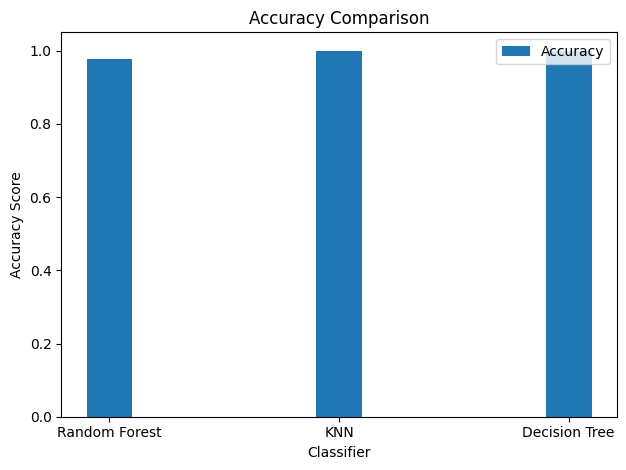

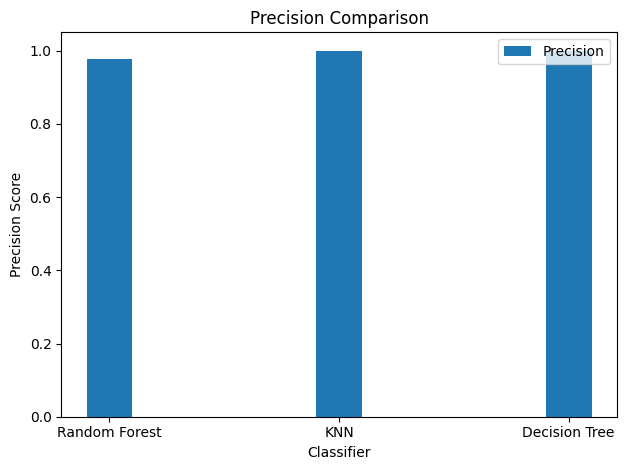

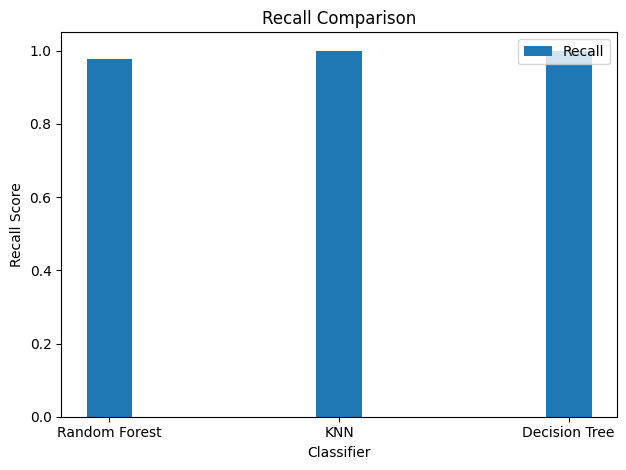

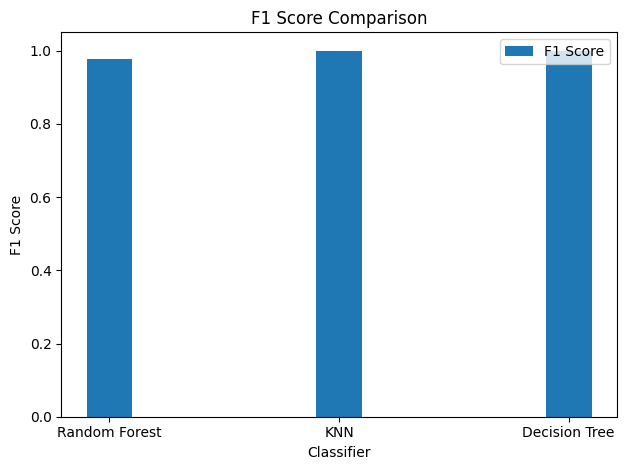

In [33]:
# Store the metrics in lists
classifiers = ['Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [accuracy_rfc, accuracy_knn, accuracy_dt]
precision_scores = [precision_rfc, precision_knn, precision_dt]
recall_scores = [recall_rfc, recall_knn, recall_dt]
f1_scores = [f1_rfc, f1_knn, f1_dt]

# Plotting the metrics
import matplotlib.pyplot as plt

# Bar width
bar_width = 0.2
index = range(len(classifiers))

# Plotting Accuracy
plt.bar(index, accuracy_scores, width=bar_width, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Precision
plt.bar(index, precision_scores, width=bar_width, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Recall
plt.bar(index, recall_scores, width=bar_width, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.title('Recall Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.bar(index, f1_scores, width=bar_width, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()